# Stock Market Analysis using Monte Carlo Simulation

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/02/92495stock-market-trends-what-causes-stock-prices-to-change.jpg" width = 800px>

# Introduction

Success in any financial market requires one to identify solid investments. When a stock or derivative is undervalued, it makes sense to buy. If it's overvalued, perhaps it's time to sell. While these finance decisions were historically made manually by professionals, technology has ushered in new opportunities for retail investors. Data scientists, specifically, may be interested to explore quantitative trading, where decisions are executed programmatically based on predictions from analysis and trained models.

Monte Carlo simulation is one of mathematical techniques to analyse stock and make sound decisions. This method offers a structured way to model and analyse stock behaviour over time. It generates a number of random scenarios based on statistical parameters. By running these simulations, one can explore a wide range of possible outcomes, including both gains and losses. It offers a quantitative way to explore complexities of the stock markets, accounting for factors like price movements, volatility, and economic events.


### S&P 500 - PG

The Procter & Gamble Company(PG) looks like a promising bet on the back of its robust pricing actions, segmental strength and improved productivity, which have been aiding its performance for a while. The company’s focus on productivity and cost-saving plans positions it to drive margins going forward. Continued business investments also bode well.

Procter & Gamble continued its robust top and bottom-line surprise trend for the third consecutive quarter in third-quarter fiscal 2023. Sales and earnings also improved year over year. The company’s organic sales grew, driven by robust pricing and a favorable mix, along with strength across segments.

### S&P 500 - Mastercard Inc Class A

Mastercard Incorporated(MA) is well poised to grow on the back of strong consumer spending, specifically across the travel sector, enhanced services suite, growth in cross-border volume and geographic expansion. Over the past year, the stock has gained 28.9%, outperforming the industry’s 16.8% growth.

Mastercard — with a market cap of $391.6 billion — is a leading global payment solutions company that provides an array of services in support of credit, debit, mobile, web-based and contactless payments, and other related electronic payment programs to financial institutions and other entities.

### Cryptocurrency - Bitcoin

Bitcoin often referred to as "digital gold", has captured attention of investors and financial experts worldwide. It is a decentralised currency that has evolved from an obscure concept into major asset class. Bitcoin investingis not just a financial trend;it represents a fundamental shift in a way we think about and store value.  

It is important to note that Bitcoin's price is impacted by market sentiment, regulatory changes, and macroeconomic events. The Monte Carlo simulation technique can be used to simulate future bitcoin prices.

# **IMPORTING PACKAGES**

In [31]:
# packages to install before running notebook
#!pip install -q yfinance
#!pip install pandas-datareader
#!pip install yahoo-finance

In [117]:
# for data access and mannipulation
import requests
import pandas as pd
import numpy as np

# visualizations
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight")
#%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from yahoo_finance import Share
from yahoo_finance import Currency
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# LOADING DATA

- Data is extracted from different sources. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments.We use Yahoo Finance API for Microsoft and Amazon Data, and Alpha Vantage API for bitcoin data and inflation data.

Data is saved as csv files.

### PG AND MASTERCARD DATA

- We start from 2019 before the pandemic to see how the market was performing and how the pandemic shaped that moving forward. This will help in decision making to see how sensitive these are/were to the pandemic. Both Data sets have equal number of rows because we chose the same time frame.

In [121]:
# we specify our start and end date
end = datetime.now()
start = datetime(2019, 1, 1)

In [122]:
#PG data
pg_df = yf.download('PG', start, end)
pg_df = pg_df.reset_index(drop = False)
pg_df['company_name'] = ['PG' for i in range(len(pg_df))]

#Mastercard data
Mastercard_df = yf.download('MA', start, end)
Mastercard_df = Mastercard_df.reset_index(drop = False)
Mastercard_df['company_name'] = ['MA' for i in range(len(Mastercard_df))]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [123]:
#How the data looks
Mastercard_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2019-01-02,185.830002,190.820007,185.309998,189.740005,184.548172,4294000,MA
1,2019-01-03,187.500000,187.509995,180.979996,181.179993,176.222336,5070900,MA
2,2019-01-04,184.850006,191.250000,184.440002,189.759995,184.567596,4452900,MA
3,2019-01-07,190.630005,193.020004,189.710007,191.220001,185.987686,4219200,MA
4,2019-01-08,189.899994,192.490005,188.500000,192.279999,187.341965,5069700,MA


- Both Datasets are in USD so we need to convert to our ZAR currency. We assume the current conversion rate, **1USD = 18,99ZAR**

In [124]:
#Mastercard
Mastercard_df['Adj Close'] = Mastercard_df['Adj Close']*18.99

Mastercard_df = Mastercard_df[['Date','Adj Close']].set_index('Date')
# first few rows
Mastercard_df.head()

,Adj Close
Date,
2019-01-02,3504.569786
2019-01-03,3346.462157
2019-01-04,3504.938656
2019-01-07,3531.906160
2019-01-08,3557.623910


In [125]:
#PG
pg_df['Adj Close'] = pg_df['Adj Close']*18.99

pg_df = pg_df[['Date','Adj Close']].set_index('Date')
# first few rows
pg_df.head()

,Adj Close
Date,
2019-01-02,1536.972120
2019-01-03,1526.195782
2019-01-04,1557.346035
2019-01-07,1551.116100
2019-01-08,1556.840831


### BITCOIN

In [157]:
# csv downloaded using using api key

bitcoin_df = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/kwanda_mlondi/main/new/BTC-USD.csv')

In [158]:
# first 5 rows of df
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-15,8373.458008,8410.714844,8182.706543,8205.369141,8205.369141,15220412632
1,2019-10-16,8204.674805,8216.812500,7985.089844,8047.526855,8047.526855,16071646996
2,2019-10-17,8047.812500,8134.831543,8000.942871,8103.911133,8103.911133,14313052244
3,2019-10-18,8100.933594,8138.413574,7902.164063,7973.207520,7973.207520,15651592610
4,2019-10-19,7973.803711,8082.629395,7944.776855,7988.560547,7988.560547,13797825640


- We will focus on the ZAR currency.

In [159]:
# taking columns with ZAR
cols = ['Date','Adj Close'] 
bitcoin_df = bitcoin_df[cols].sort_values(by = ['Date'],ascending = True )
bitcoin_df['Adj Close'] = bitcoin_df['Adj Close']*18.99

bitcoin_df = bitcoin_df.set_index('Date')

bitcoin_df.head()

,Adj Close
Date,
2019-10-15,155819.959988
2019-10-16,152822.534976
2019-10-17,153893.272416
2019-10-18,151411.210805
2019-10-19,151702.764788


- Our data now comforms to our currency.

# MONTE CARLO SIMULATION

### Brownian motion
Geometric Brownian motion is a mathematical model for predicting the future price of stock. The phase that done before stock price prediction is determine stock expected price formulation and determine the confidence level of 95%.

Stock markets, the foreign exchange markets, commodity markets and bond markets are all assumed to follow Brownian motion,
where assets are changing continually over very small intervals of time and the position, namely the change of state on the assets, is being altered by random amounts. More importantly, the mathematical models used to describe Brownian motion are the fundamental tools on which all financial asset pricing and derivatives pricing models are based.

- We use this technique in our simulation.

### SIMULATING PG STOCK FOR THE NEXT 5 YEARS

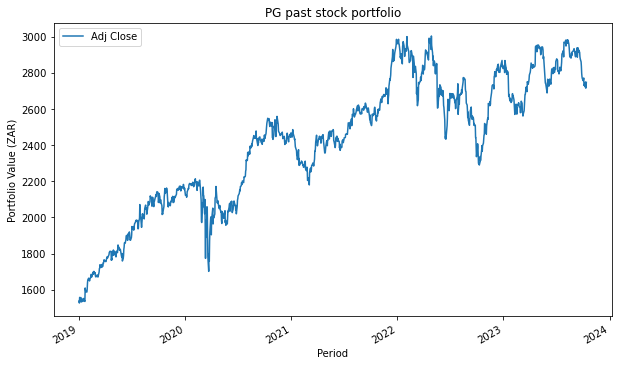

In [160]:
pg_df.plot(figsize = (10,6))
plt.ylabel('Portfolio Value (ZAR)')
plt.xlabel('Period')
plt.title('PG past stock portfolio')
plt.show()

- As we can see that the stock price has been increasing since 2019.

#### Percentage Change

Computes the fractional change from the immediately previous data point. This is useful in comparing the fraction of change in a time series of elements.

In [161]:
# log returns
log_returns = np.log(1+pg_df.pct_change())

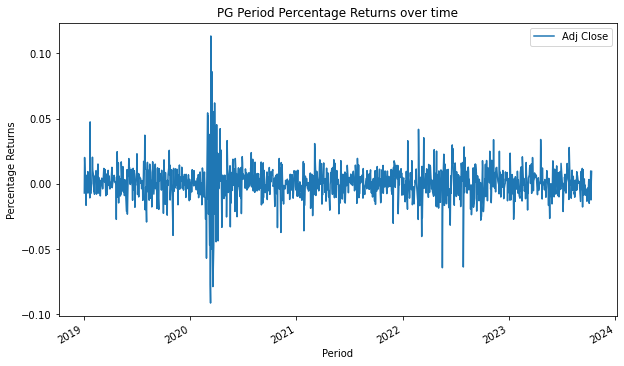

In [162]:
log_returns.plot(figsize = (10,6))
plt.ylabel('Percentage Returns')
plt.xlabel('Period')
plt.title('PG Period Percentage Returns over time')
plt.show()

- We see that a major change was observed in the first half of 2020, that's when the COVID 19 virus first hit.

In [163]:
# mean calculation
u = log_returns.mean()
u

Adj Close    0.000483
dtype: float64

In [164]:
#variance calc
var = log_returns.var()
var

Adj Close    0.000181
dtype: float64

#### Drift
- drift refers to the change over time in the statistical properties of the data that was used to train a machine learning model. This can cause the model to become less accurate or perform differently than it was designed to. Drift can also refer to the change of the average value of a stochastic (random) process in probability theory.

In [165]:
# drift
drift = u - (0.5*var)
drift

Adj Close    0.000392
dtype: float64

In [166]:
# standard deviation
stdev = log_returns.std()
stdev

Adj Close    0.013439
dtype: float64

In [167]:
#normal distribution
norm.ppf(0.95)

1.6448536269514722

In [168]:
# instantiate our simulation parameters
x = np.random.rand(10,2)
z = norm.ppf(np.random.rand(10,2)) # number of standard deviation from mean to event
t_intervals = 365*5 # We look to simulate the next 5 years
iterations = 10 # 10 series of stock price predictions

In [169]:
# instantiate portfolio 
daily_changes = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
price_list = np.zeros_like(daily_changes)
price_list[0] = 100000/pg_df.iloc[-1] # initial amount in our portfolio

In [170]:
for t in range(1, t_intervals):
    
    price_list[t] = price_list[t-1]*daily_changes[t]

In [171]:
initial_df = pd.DataFrame({'x': [i for i in range(0,365*5)],'y': [100000/pg_df.iloc[-1] for i in range(0,365*5)]})
initial_d = pd.DataFrame({'x': [i for i in range(0,365*5)],'y': [2*100000/pg_df.iloc[-1] for i in range(0,365*5)]})

Text(0.5, 1.0, 'PG simulation of a stock portfolio')

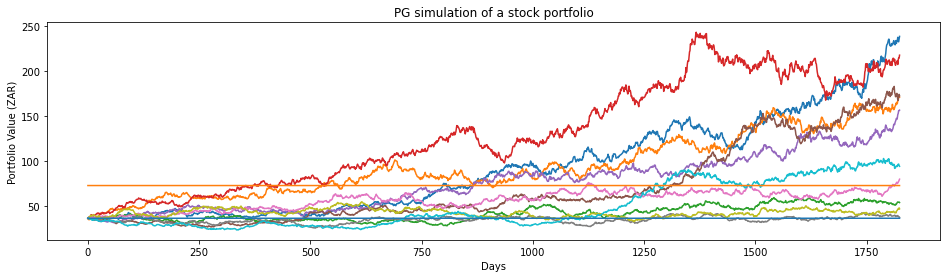

In [172]:
plt.figure(figsize=(16,4))
plt.plot(price_list)
plt.plot(initial_df['y'])
plt.plot(initial_d['y'])
plt.ylabel('Portfolio Value (ZAR)')
plt.xlabel('Days')
#plt.legend(['Initial Amount'])
plt.title('PG simulation of a stock portfolio')

- The blue line represent our starting amount in our portfolio. Orange line is double the starting amount in our portfolio.
We can see that there's less probability that the amount we invest in PG may lose value than gaining value.

- We can also see that in the next 5 years, there's a probability that our investment may double in value.

### SIMULATING Mastercard Inc STOCK FOR THE NEXT 5 YEARS

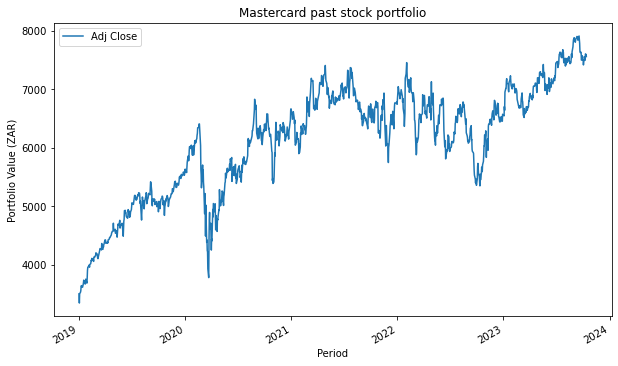

In [173]:
Mastercard_df.plot(figsize = (10,6))
plt.ylabel('Portfolio Value (ZAR)')
plt.xlabel('Period')
plt.title('Mastercard past stock portfolio')
plt.show()

- As we can see that the stock price has been increasing since 2019.

#### Percentage Change

Computes the fractional change from the immediately previous data point. This is useful in comparing the fraction of change in a time series of elements.

In [174]:
# log returns
log_returns = np.log(1+Mastercard_df.pct_change())

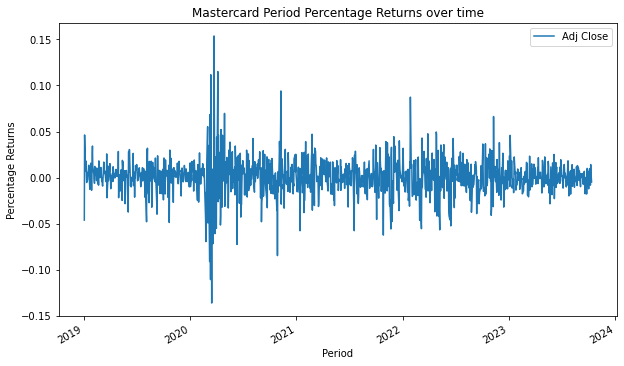

In [175]:
log_returns.plot(figsize = (10,6))
plt.ylabel('Percentage Returns')
plt.xlabel('Period')
plt.title('Mastercard Period Percentage Returns over time')
plt.show()

In [176]:
# mean calculation
u = log_returns.mean()
u

Adj Close    0.000638
dtype: float64

In [177]:
#variance calc
var = log_returns.var()
var

Adj Close    0.000407
dtype: float64

#### Drift
- drift refers to the change over time in the statistical properties of the data that was used to train a machine learning model. This can cause the model to become less accurate or perform differently than it was designed to. Drift can also refer to the change of the average value of a stochastic (random) process in probability theory.

In [178]:
# drift
drift = u - (0.5*var)
drift

Adj Close    0.000435
dtype: float64

In [179]:
# standard deviation
stdev = log_returns.std()
stdev

Adj Close    0.020171
dtype: float64

In [180]:
# instantiate our simulation parameters
x = np.random.rand(10,2)
z = norm.ppf(np.random.rand(10,2)) # number of standard deviation from mean to event
t_intervals = 365*5 # We look to simulate the next 5 years
iterations = 10 # 10 series of stock price predictions

# instantiate portfolio 
daily_changes = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
price_list = np.zeros_like(daily_changes)
price_list[0] = 100000/Mastercard_df.iloc[-1] # initial amount in our portfolio

In [181]:
for t in range(1, t_intervals):
    
    price_list[t] = price_list[t-1]*daily_changes[t]
    
initial_df = pd.DataFrame({'x': [i for i in range(0,365*5)],'y': [100000/Mastercard_df.iloc[-1] for i in range(0,365*5)]})
initial_d = pd.DataFrame({'x': [i for i in range(0,365*5)],'y': [2*100000/Mastercard_df.iloc[-1] for i in range(0,365*5)]})

Text(0.5, 1.0, 'Mastercard In simulation of a stock portfolio')

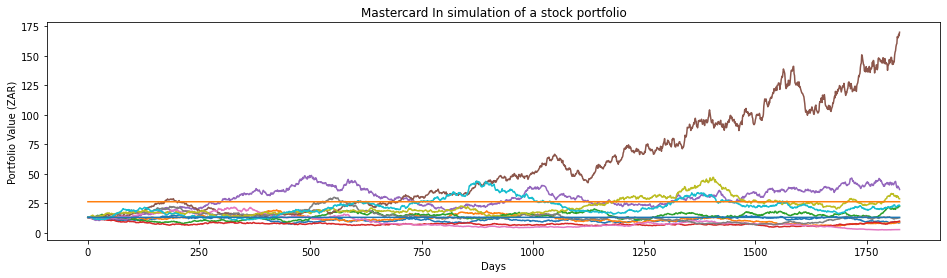

In [182]:
plt.figure(figsize=(16,4))
plt.plot(price_list)
plt.plot(initial_df['y'])
plt.plot(initial_d['y'])
plt.ylabel('Portfolio Value (ZAR)')
plt.xlabel('Days')
#plt.legend(['Initial Amount'])
plt.title('Mastercard In simulation of a stock portfolio')

- The blue line represent our starting amount in our portfolio. Orange line is double the starting amount in our portfolio.
We can see that there's less probability that the amount we invest in Mastercard may lose value than gaining value.

- We can also see that in the next 5 years, there's a probability that our investment may quadriple in value.

### SIMULATING Bitcoin STOCK FOR THE NEXT 5 YEARS

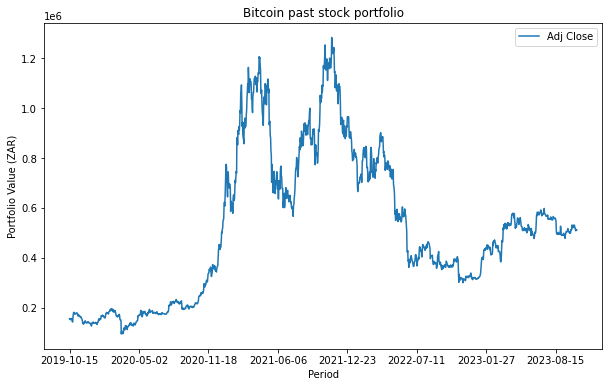

In [183]:
bitcoin_df.plot(figsize = (10,6))
plt.ylabel('Portfolio Value (ZAR)')
plt.xlabel('Period')
plt.title('Bitcoin past stock portfolio')
plt.show()

#### Percentage Change

Computes the fractional change from the immediately previous data point. This is useful in comparing the fraction of change in a time series of elements.

In [184]:
# log returns
log_returns = np.log(1+bitcoin_df.pct_change())

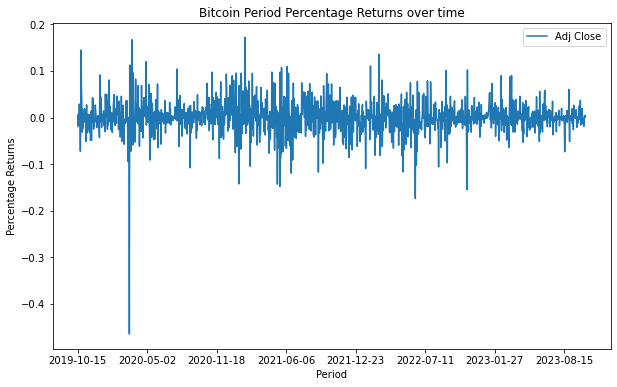

In [185]:
log_returns.plot(figsize = (10,6))
plt.ylabel('Percentage Returns')
plt.xlabel('Period')
plt.title('Bitcoin Period Percentage Returns over time')
plt.show()

In [186]:
# mean calculation
u = log_returns.mean()
u

Adj Close    0.000815
dtype: float64

In [187]:
#variance calc
var = log_returns.var()
var

Adj Close    0.001277
dtype: float64

#### Drift
- drift refers to the change over time in the statistical properties of the data that was used to train a machine learning model. This can cause the model to become less accurate or perform differently than it was designed to. Drift can also refer to the change of the average value of a stochastic (random) process in probability theory.

In [188]:
# drift
drift = u - (0.5*var)
drift

Adj Close    0.000176
dtype: float64

In [189]:
# standard deviation
stdev = log_returns.std()
stdev

Adj Close    0.035728
dtype: float64

In [190]:
# instantiate our simulation parameters
x = np.random.rand(10,2)
z = norm.ppf(np.random.rand(10,2)) # number of standard deviation from mean to event
t_intervals = 365*5 # We look to simulate the next 5 years
iterations = 10 # 10 series of stock price predictions

# instantiate portfolio 
daily_changes = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
price_list = np.zeros_like(daily_changes)
price_list[0] = 100000/bitcoin_df.iloc[-1] # initial amount in our portfolio

In [191]:
for t in range(1, t_intervals):
    
    price_list[t] = price_list[t-1]*daily_changes[t]
    
initial_df = pd.DataFrame({'x': [i for i in range(0,365*5)],'y': [100000/bitcoin_df.iloc[-1] for i in range(0,365*5)]})
initial_d = pd.DataFrame({'x': [i for i in range(0,365*5)],'y': [2*100000/bitcoin_df.iloc[-1] for i in range(0,365*5)]})

Text(0.5, 1.0, 'Bitcoin In simulation of a stock portfolio')

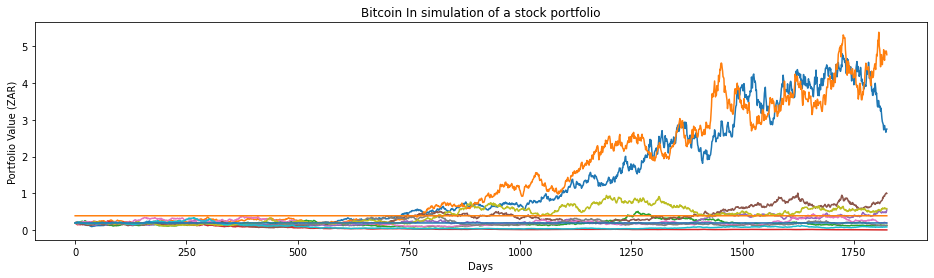

In [192]:
plt.figure(figsize=(16,4))
plt.plot(price_list)
plt.plot(initial_df['y'])
plt.plot(initial_d['y'])
plt.ylabel('Portfolio Value (ZAR)')
plt.xlabel('Days')
#plt.legend(['Initial Amount'])
plt.title('Bitcoin In simulation of a stock portfolio')

- The blue line represent our starting amount in our portfolio. Orange line is double the starting amount in our portfolio.
We can see that there's approximately 80% chance that we may not see growth in our investment if we put money in bitcoin. but 20% chance that our investment may have dramatic returns. 